In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### **1. Generate and Plot the Elementary Signals in DSP**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


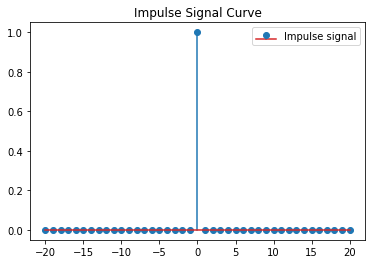

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


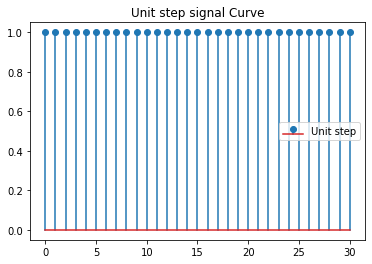

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


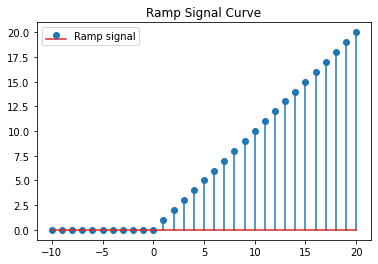

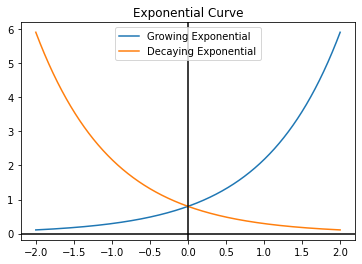

In [ ]:
# Impulse Signal   ----> if n = 0 the signal value is 1, otherwise the vsignal value is 0.

x=[]
s = np.zeros(41)
s.shape
s[20] = 1
x= np.arange(-20, 21)

plt.title("Impulse Signal Curve")
plt.stem(x, s)
plt.legend(['Impulse signal'])
plt.show()


#Unit step ---- if n >= 0 the signal value is 1, if n<0 the signal value is 0.
s = np.ones(31)
x = np.arange(0, 31, 1)
plt.title("Unit step signal Curve")
plt.stem(x, s) 
plt.legend(['Unit step'])
plt.show()


# Ramp signal --->the signal will be increase if the input is n>=0, otherwise signal is Zero
s = []
for i in range(-10, 21):
  if i >= 0:
    s.append(i)
  else:
    s.append(0)
    
x = []
x = np.arange(-10,21)
plt.title("Ramp Signal Curve")
plt.stem(x, s)
plt.legend(['Ramp signal'])
plt.show()


# for i in range(-10, 21):
#   x.append(i)


#Exponential Signal

# Generating time data using arange function from numpy
time = np.arange(-2,2, 0.0001)
constant = 0.8

# Finding amplitude at each time
amplitude_grow = constant * np.exp(time)
amplitude_decay = constant * np.exp(-time)

# Plotting time vs amplitude using plot function from pyplot
plt.plot(time, amplitude_grow, time, amplitude_decay)


plt.title('Exponential Curve')

# Showing legends
plt.legend(['Growing Exponential','Decaying Exponential'])


# Highlighting axis at x=0 and y=0
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')


plt.show()


#### **2. Compute the Linear Convolution of Two Signal** :

In [ ]:
# Linera convolution of two signal 


x = [1, 2, 3, 4]   # Input signal
h = [1, 2, 3, 4]   # Impulse response

l1 = len(x)
l2 = len(h)

convolution = [0 for i in range(l1 + l2 - 1)]  # Array filled with zeros


for row in range(l1):
  for col in range(l2):
    convolution[row + col] += x[row] * h[col]

print("Linear convolution of the two signal: ")
print(convolution)

Linear convolution of the two signal: 
[1, 4, 10, 20, 25, 24, 16]


#### **3. Compute the cross-correlation sequence of two signals x(n) and h(n).**

In [ ]:
# Cross-Correlation of two signal

x = [0,0, 2,-1,3,7,1,2,-3,0,0]      # Input signal x
y = [0, 0,1,-1,2,-2,4,1,-2,5,0,0]   # Input signal y

l1 = len(x)
l2 = len(y)

cross_correlation = [0 for i in range(l1 + l2 - 1)]   # Array(output) filled with zeros

 
y = np.flip(y) # Reverse y

for row in range(l1):
  for col in range(l2):
    cross_correlation[row + col] += x[row] * y[col]

print("Cross Correlation of the sequence:",cross_correlation)
# print(cross_correlation)

Cross Correlation of the sequence: [0, 0, 0, 0, 10, -9, 19, 36, -14, 33, 0, 7, 13, -18, 16, -7, 5, -3, 0, 0, 0, 0]


#### **4. Determine the autocorrelation sequence of the signal x(n).**

In [ ]:
# Auto Correlation of signal x(n)

x = [1, 2, 1, 1]

x1 = x             # Cooy x into y 
x1 = np.flip(x1)    # Reverse the array y

l1 = len(x)
l2 = len(x1)

auto_correlation = [0 for i in range(l1 + l2 - 1)]   # # Array(output) filled with zeros

for row in range(l1):
  for col in range(l2):
    auto_correlation[row + col] += x[row] * x1[col]

print("Auto Correlation of signal x: ", auto_correlation)


Auto Correlation of signal x:  [1, 3, 5, 7, 5, 3, 1]


#### **5. Discrete Fourier Transform (DFT) of a signal using DFT equation.**

In [ ]:
# Function to find DFT of a signal x(n)
def DFT(x):
  N = len(x);
  List = []       # Declear an empty list to store value

  # Nested Loop to find out X(k)  
  for k in range(N):
    value = 0;
    for n in range(N):
      value += x[n] * np.exp((-2j * np.pi * k * n) / N) 

    List.append(value)   
  return List   


# Main body Function

x = [2, -1, 3, 7, 1, 2, -3]   # Input Signal

dft = DFT(x)
print("DFT of The Signal x: ")
print(dft) 


DFT of The Signal x: 
[(11+0j), (-8.814314820435857-5.1418933118232335j), (3.3731578111830305+3.1750168095620896j), (6.9411570092528345-5.935503468858023j), (6.941157009252824+5.935503468858032j), (3.373157811183029-3.175016809562078j), (-8.814314820435856+5.141893311823223j)]


#### **6. Inverse DFT of the signal obtained in (5).**

In [ ]:
# Function to find IDFT
def IDFT(List):
  N = len(List)
  x = []

  for n in range(N):
    value =0
    for k in range(N):
      value += List[k] * np.exp((2j * np.pi * k * n) / N)
    value /= N
    x.append(value)

  return x;      

# Print value of IDFT from DFT
idft = IDFT(dft)
print("Value of IDFT: ")
print(idft)
print(" ")


# Round value to check 
Array = [round(i.real) for i in idft]
print("After taking the real part rounding the double values: ")
print(Array)
print(" ")

# Cross check value
if Array == x:
  print("After Converting the DFT to IDFT the value is matched!")
else :
  print("Not macthed!")  

Value of IDFT: 
[(2.0000000000000004+1.395708945243054e-15j), (-0.9999999999999984-2.0301221021717147e-15j), (2.9999999999999987-2.537652627714643e-15j), (6.9999999999999964+2.8548592061789737e-16j), (1.0000000000000002+1.0150610510858574e-15j), (1.999999999999996+0j), (-2.9999999999999982-1.0785023667787234e-15j)]
 
After taking the real part rounding the double values: 
[2, -1, 3, 7, 1, 2, -3]
 
After Converting the DFT to IDFT the value is matched!


##### **7. By means of the DFT and IDFT, the response of the FIR filter with impulse response h(n) to the input sequence x(n).**

In [ ]:
x = [1, 2, 3, 4, 5]
h = [1, 2, 3, 4, 5]


print("Linear convolution of x and h: ")
print(np.convolve(h, x)) # using convolution library function
print(" ")

 
padding = len(h) + len(x) - 1

while True:
  if len(x) != padding:
    x.append(0)
  else:
    break

while True:
  if len(h) != padding:
    h.append(0)
  else:
    break

H = DFT(h) 
X = DFT(x) 
print("DFT of h: ")
print(H)
print(" ")
print("DFT of x: ")
print(X)
print(" ")


List = [0 for i in range(len(X))]   # List filled with zeros 

for i in range(len(X)):
  List[i] = H[i] * X[i]  

idft = IDFT(List)

print("After IDFT the value: ")
print(idft)
print(" ")

print("Again Linear convolution after performing IDFT: ")
List = [round(i.real) for i in idft]
print(List)

Linear convolution of x and h: 
[ 1  4 10 20 35 44 46 40 25]
 
DFT of h: 
[(15+0j), (-3.645429684690794-9.414200810175803j), (0.3584407085710235+3.682363727569029j), (3.1086244689504383e-15-3.4641016151377566j), (0.28698897611976837+2.704259692331565j), (0.2869889761197659-2.7042596923315685j), (-6.661338147750939e-15+3.46410161513775j), (0.3584407085710266-3.6823637275690237j), (-3.6454296846908054+9.414200810175792j)]
 
DFT of x: 
[(15+0j), (-3.645429684690794-9.414200810175803j), (0.3584407085710235+3.682363727569029j), (3.1086244689504383e-15-3.4641016151377566j), (0.28698897611976837+2.704259692331565j), (0.2869889761197659-2.7042596923315685j), (-6.661338147750939e-15+3.46410161513775j), (0.3584407085710266-3.6823637275690237j), (-3.6454296846908054+9.414200810175792j)]
 
After IDFT the value: 
[(1.0000000000000284-2.3684757858670004e-14j), (4.000000000000009-3.335603398429359e-14j), (9.999999999999995-1.9737298215558338e-14j), (19.999999999999993-1.2631870857957336e-14j), (34.99

#### **8. Fast Fourier Transform (FFT) using divide and conquer approach**

In [ ]:
x = [1, 2, 3, 4, 5, 6]   #Input signal
N = len(x)

#Factor: 2 rows, 3 columns
L = 2
M = 3

#Store value into array column-wise
Array = np.zeros((2, 3))
for i in range(L):
  for j in range(M):
    index = j * L
    index += i
    Array[i][j] = x[index]
         
dft = [DFT(Array[i]) for i in range(L)]

for l in range(L):
  for q in range(M):
    dft[l][q] = dft[l][q] * np.exp((-2j * np.pi * l * q) / N)
    
for j in range(M):
  col_element = [dft[i][j] for i in range(L)]
  col_element = DFT(col_element)

  for i in range(L):
    dft[i][j] = col_element[i]

Array = [] 

for i in range(len(dft)):
  for j in range(len(dft[0])):
    Array.append(dft[i][j])


print("Fast Fourier Transform(FFT) Using divide and Conquer Approach:")
print(Array) 


Fast Fourier Transform(FFT) Using divide and Conquer Approach:
[(21+0j), (-3.000000000000005+5.196152422706631j), (-3.0000000000000027+1.7320508075688736j), (-3-1.4695761589768238e-15j), (-2.9999999999999982-1.7320508075688794j), (-2.9999999999999916-5.196152422706634j)]


#### **9. FFT of a given signal with N = 8 using Radix-2 algorithm.**

In [ ]:
def radix2(y):
  
  N = len(y)
  if N == 2:            #Calculate DFT of 2 points 
    dft = DFT(y)
    return dft

  arra_even = []
  arra_odd = []  

  #Separated even and odd value into two list
  i = 0
  while i < N:
    if i%2 == 0:
      arra_even.append(y[i])
    else:
      arra_odd.append(y[i])
    i += 1

  # N/2 point DFT of x_even & x_odd   
  Array_even = radix2(arra_even) 
  Array_odd = radix2(arra_odd)    


  Array = [] 
  #Get first N / 2 terms
  k = 0
  while k < N / 2:
    Array.append( np.exp((-2j * np.pi * k) / N) * Array_odd[k] + Array_even[k]) 
    k += 1

  #Get last N / 2 terms
  k = 0
  while k < N / 2:
    Array.append(Array_even[k] - np.exp((-2j * np.pi * k) / N) * Array_odd[k])
    k += 1

  return Array   #Get full N value   


# Main body program
x = [1, 2, 3, 4, 5, 6, 7, 8]   #Input 
ans = radix2(x)
print("Fast Fourier Transform (FFT) of the signal x:")
print(" ")
print(ans)


Fast Fourier Transform (FFT) of the signal x:
 
[(36+0j), (-4.000000000000002+9.65685424949238j), (-4+4j), (-4.000000000000001+1.6568542494923788j), (-4+0j), (-3.9999999999999996-1.6568542494923801j), (-3.9999999999999996-4j), (-3.9999999999999973-9.65685424949238j)]
